In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that I'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python


import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [2]:

file="c:\\Users\mehrz\Documents\Python Scripts\online_retail_2.csv"

#file="https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

df= pd.read_csv(file)


df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape

(1067371, 8)

In [4]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Customer ID    243007
Description      4382
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64

In [5]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
# change the invoice_date string format to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%Y-%m-%d %H:%M:%S' , errors='ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [9]:
# or df[:10] 
df.head(2)
# to delet the out put:
#from IPython.display import clear_output
#clear_output(wait=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [10]:
# df_new without missing values
df_no_missing = df.dropna()
# also we could use df.dropna(inplace = True)

In [11]:
# If I wanted just to remove the blank customer IDs, I could just simply write:
# df = df[pd.notnull(df['CustomerID'])]

In [12]:
# check missing values for each column 
df_no_missing.isnull().sum().sort_values(ascending=False)

Country        0
Customer ID    0
Price          0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
Invoice        0
dtype: int64

In [16]:
# change columns tyoe - String to Int type 
df_no_missing['Customer ID'] = df_no_missing['Customer ID'].astype('int64')

# or e.g. df = df.astype({"Name":'category', "Age":'int64'}) 

In [17]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [145]:
after=type(df_no_missing['Customer ID'][0])
after

numpy.int64

In [146]:
# Rename the dataframe to make code more readable
df2 = df_no_missing.copy()

In [147]:
df2.describe().round(2)

,Quantity,Price,Customer ID
count,824364.00,824364.00,824364.00
mean,12.41,3.68,15324.64
std,188.98,70.24,1697.46
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13975.00
50%,5.00,1.95,15255.00
75%,12.00,3.75,16797.00
max,80995.00,38970.00,18287.00


In [148]:
df.describe().round(2)

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [149]:
df2[df2['Quantity']<0].count()

Invoice        18744
StockCode      18744
Description    18744
Quantity       18744
InvoiceDate    18744
Price          18744
Customer ID    18744
Country        18744
dtype: int64

In [150]:
a=df2['Quantity']<0

In [151]:
a

0          False
1          False
2          False
3          False
4          False
           ...  
1067366    False
1067367    False
1067368    False
1067369    False
1067370    False
Name: Quantity, Length: 824364, dtype: bool

In [152]:
df2[a]['Quantity'].count()

18744

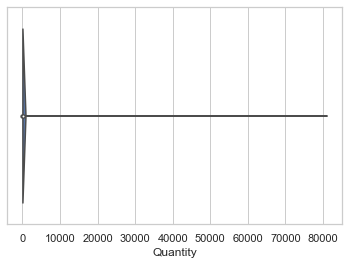

In [215]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

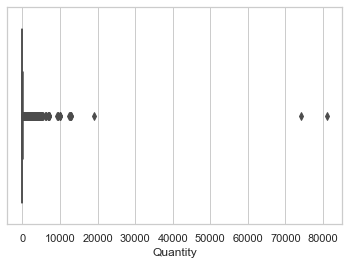

In [216]:
sns.boxplot(x=df2["Quantity"])

In [219]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]
# df2 = df2.loc[df2['Quantity'] > 0]

df2.describe().round(2)

,Quantity,year_month,hour,Price,Customer ID,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter
count,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00,805620.00
mean,13.31,201049.84,12.80,3.21,15331.86,22.02,2010.42,7.51,15.20,3.65,212.38,30.49,2.82
std,144.31,56.25,2.29,29.20,1696.77,224.03,0.57,3.45,8.69,1.95,104.12,14.91,1.13
min,1.00,200912.00,6.00,0.00,12346.00,0.00,2009.00,1.00,1.00,1.00,4.00,1.00,1.00
25%,2.00,201007.00,11.00,1.25,13982.00,4.95,2010.00,5.00,8.00,2.00,125.00,18.00,2.00
50%,5.00,201012.00,13.00,1.95,15271.00,11.85,2010.00,8.00,15.00,4.00,234.00,34.00,3.00
75%,12.00,201107.00,14.00,3.75,16805.00,19.50,2011.00,11.00,23.00,5.00,308.00,44.00,4.00
max,80995.00,201112.00,20.00,10953.50,18287.00,168469.60,2011.00,12.00,31.00,7.00,357.00,52.00,4.00


In [155]:
df2['Quantity'].count()

805620

In [156]:
df2[df2.Quantity > 0]['Quantity'].count()

805620

In [157]:
df2['Customer ID']>100

0          True
1          True
2          True
3          True
4          True
           ... 
1067366    True
1067367    True
1067368    True
1067369    True
1067370    True
Name: Customer ID, Length: 805620, dtype: bool

In [158]:
# note: this will not work: dd=df2. Customer ID

In [159]:
df[["Quantity"]].head(3)

,Quantity
0,12
1,12
2,12


In [160]:
df[["Quantity", "Price"]].head(3)

,Quantity,Price
0,12,6.95
1,12,6.75
2,12,6.75


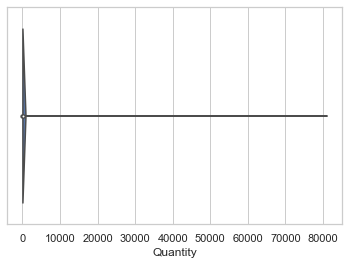

In [220]:
ax = sns.violinplot(x=df2["Quantity"])

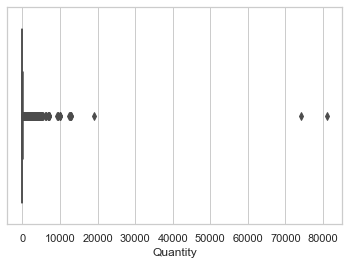

In [221]:
sns.boxplot(x=df2["Quantity"])

In [162]:
df2['AmountSpent'] = df2['Quantity'] * df2['Price']
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,AmountSpent
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [163]:
#Let's add Month_Year Colummn
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,AmountSpent,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12


In [164]:
#Syntax : getattr(obj, key, def)

#obj : The object whose attributes need to be processed.
#key : The attribute of object
#def : The default value that need to be printed in case attribute is not found.

In [165]:
Dattr = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']

df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in Dattr), axis=1))
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12,2009,12,1,1,335,49,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,1,335,49,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,1,335,49,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12,2009,12,1,1,335,49,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12,2009,12,1,1,335,49,4


In [166]:
# 2009-12-01 is Tu which is indicated DoW=1 here. To make Monday=1.....until Sunday=7 we add 1 to all numbers
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12,2009,12,1,2,335,49,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,2,335,49,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,2,335,49,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12,2009,12,1,2,335,49,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12,2009,12,1,2,335,49,4


In [167]:

#To test my approache: 2011-03-30 is Wednesday, should come 3: df2.iloc [500000 , :]

# Data Story

In [168]:
#grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
#grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
#grouped_multiple = grouped_multiple.reset_index()
#print(grouped_multiple)


In [169]:

# Firlst lets Consolidate the number of Sales(using InvoiceNo as the count for sales) Made per customer for each country

sales_per_cust = df2.groupby(by=['Customer ID','Country'], as_index=False)['Invoice'].count().sort_values(by='Invoice', ascending=False)
sales_per_cust.columns = ['Customer ID', 'Country', 'NumberOfSales']
sales_per_cust.head(5)

,Customer ID,Country,NumberOfSales
5449,17841,United Kingdom,12890
2554,14911,EIRE,11247
413,12748,United Kingdom,7230
2252,14606,United Kingdom,6566
1745,14096,United Kingdom,5111


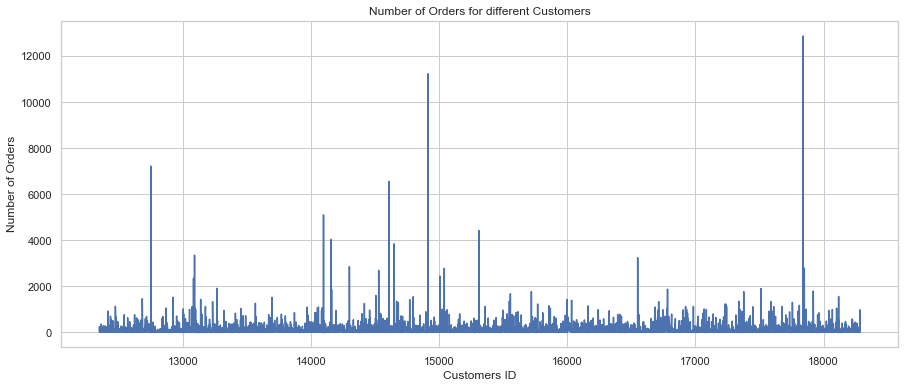

In [170]:
# No. of Sales per each Customer _ Visualization

No_of_orders = df2.groupby(by=['Customer ID','Country'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(No_of_orders['Customer ID'], No_of_orders['Invoice'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [171]:
# Consolidating the Sales Made per customer (Revenue)
#Use index=False, to tell the groupby that we don't want to set the column ID as index


spent_per_cust = df2.groupby(by=['Customer ID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['Customer ID', 'Country', "TotalSpent"]
spent_per_cust.head(4)



# What if I use this command instead? to get the total in sales made per customer invoice
# spentAmountPerCustomet'sInvoice_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'AmountSpent': sum,'InvoiceDate': max})

,Customer ID,Country,TotalSpent
5708,18102,United Kingdom,608821.65
2292,14646,Netherlands,528602.52
1804,14156,EIRE,313946.37
2554,14911,EIRE,295972.63


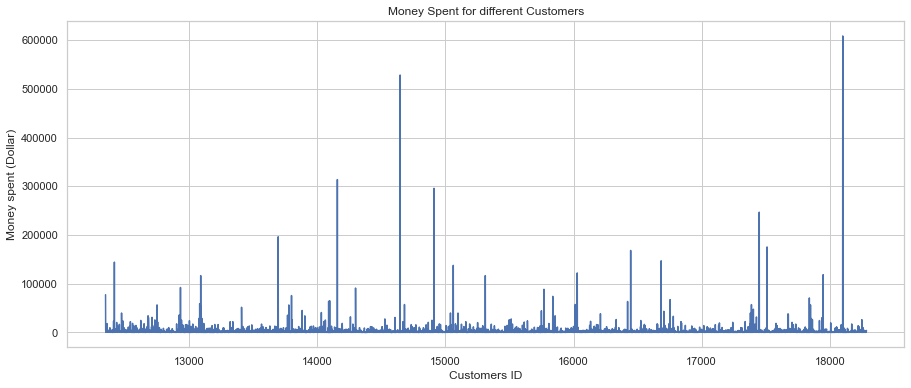

In [214]:
# Money Spent per Customer _  Visualization 

money_spent = df2.groupby(by=['Customer ID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent['Customer ID'], money_spent['AmountSpent'])
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# Pattern of Customers' Purchasing

In [173]:
# Now We want to insert a new columns as our 6th column (index 5) with year_month by joining our year with month from our InvoiceDate field


df2.insert(loc=5, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [174]:
# Now we want to insert a new column as our 7th column (index 6) with our Hour extracted from InvoiceDate


df2.insert(loc=6, column='hour', value=df2.InvoiceDate.dt.hour)

In [175]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,year_month,hour,Price,Customer ID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,200912,7,6.95,13085,United Kingdom,83.4,2009-12,2009,12,1,2,335,49,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,200912,7,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,2,335,49,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,200912,7,6.75,13085,United Kingdom,81.0,2009-12,2009,12,1,2,335,49,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,200912,7,2.10,13085,United Kingdom,100.8,2009-12,2009,12,1,2,335,49,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,200912,7,1.25,13085,United Kingdom,30.0,2009-12,2009,12,1,2,335,49,4


In [176]:
# Why here X.attr works while in sections befere, It did ont?

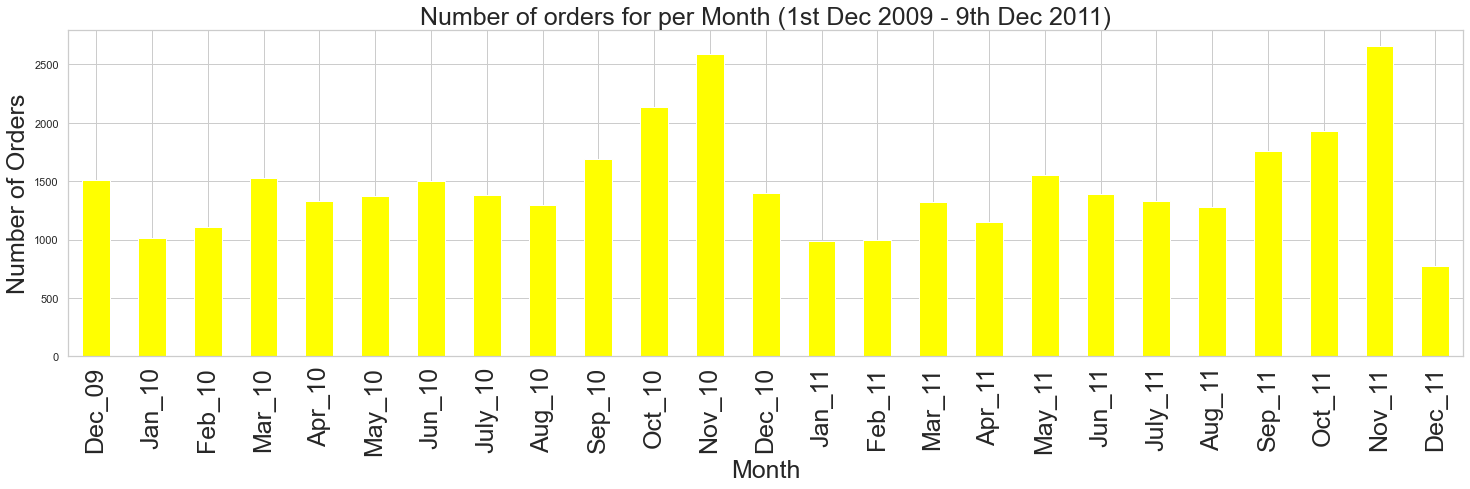

In [181]:
# Visualization_Number of orders per month


ax = df2.groupby('Invoice')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color="yellow", figsize=(25,6))
ax.set_xlabel('Month',fontsize=25)
ax.set_ylabel('Number of Orders',fontsize=25)
ax.set_title('Number of orders for per Month (1st Dec 2009 - 9th Dec 2011)',fontsize=25)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10', 'Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='vertical', fontsize=25)
plt.show()

In [178]:
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
pal = sea.color_palette("Reds_r",len(df))

NameError: name 'array' is not defined

In [182]:
# Number of orders per day of the week


df2.groupby('Invoice')['dayofweek'].unique().value_counts().sort_index()

[1]    5755
[2]    6628
[3]    6649
[4]    7774
[5]    5391
[6]      30
[7]    4748
Name: dayofweek, dtype: int64

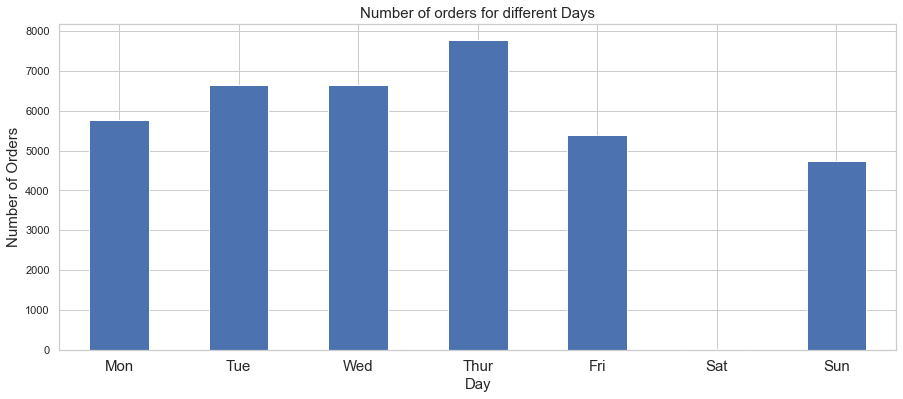

In [183]:
# Visualization_Number of orders per day of the week


ax = df2.groupby('Invoice')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

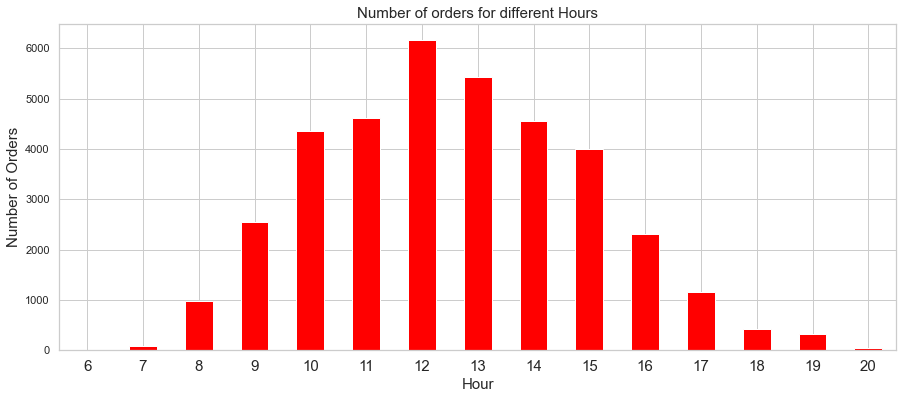

In [184]:
# Visualization_Number of orders per hour


ax = df2.groupby('Invoice')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar', color="red",figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

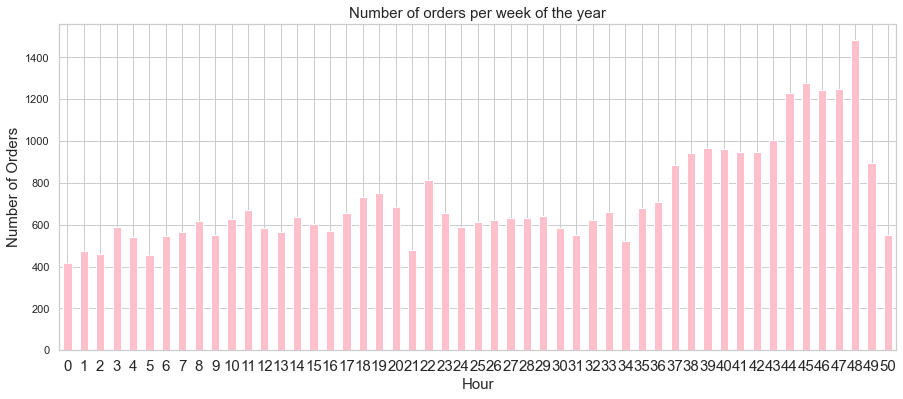

In [187]:
# Visualization_ Number of sales per week of the year


ax = df2.groupby('Invoice')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar', color="pink",figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

# Items' Unit Price Study

In [188]:
df2.Price.describe()

count    805620.000000
mean          3.206279
std          29.197901
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

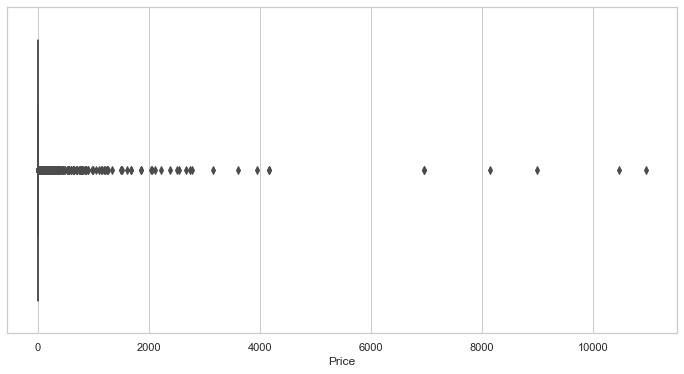

In [189]:
# Dstribution of unit price

plt.subplots(figsize=(12,6))
sns.boxplot(df2.Price)
plt.show()

In [190]:
# Is there any free item?????

df_free = df2[df2.Price == 0]
print(len(df_free))
df_free.head()

71


,Invoice,StockCode,Description,Quantity,InvoiceDate,year_month,hour,Price,Customer ID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,200912,13,0.0,16126,United Kingdom,0.0,2009-12,2009,12,2,3,336,49,4
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,200912,11,0.0,15658,United Kingdom,0.0,2009-12,2009,12,3,4,337,49,4
16107,490727,M,Manual,1,2009-12-07 16:38:00,200912,16,0.0,17231,United Kingdom,0.0,2009-12,2009,12,7,1,341,50,4
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,200912,15,0.0,14108,United Kingdom,0.0,2009-12,2009,12,8,2,342,50,4
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,200912,15,0.0,14108,United Kingdom,0.0,2009-12,2009,12,8,2,342,50,4


In [191]:
# When these free items were given out????????
df_free.year_month.value_counts().sort_index()

200912     7
201001     3
201002     2
201003     1
201004     3
201006     3
201007     1
201008     1
201009     3
201010     2
201011     4
201012     4
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

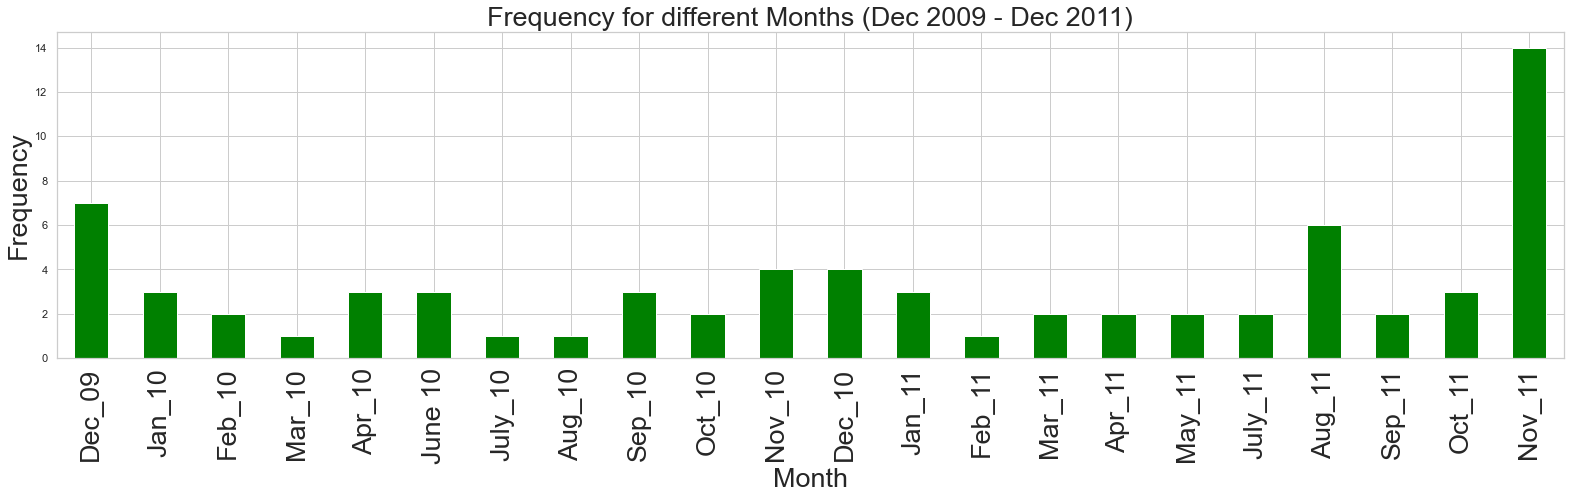

In [193]:
#Visualization_Graph of Free items over time
#based on the above info we set the xticklables


ax = df_free.year_month.value_counts().sort_index().plot(kind='bar', color="green", figsize=(27,6))
ax.set_xlabel('Month',fontsize=27)
ax.set_ylabel('Frequency',fontsize=27)
ax.set_title('Frequency for different Months (Dec 2009 - Dec 2011)',fontsize=27)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10', 'June 10','July_10','Aug_10','Sep_10','Oct_10','Nov_10', 'Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='vertical', fontsize=27)
plt.show()


In [194]:
df_free.year_month.value_counts().mean()
# From the graph we can say; On average, the company gave out 2-4 times FREE items to customers each month 
#(Except in May 2010 and June 2011)

3.227272727272727

# Analysis per Country

In [195]:
# To calculate Number of unique customers in each country (with UK) we group orders by country

NumberofOrdersPerCountry = df2.groupby('Country')['InvoiceDate'].count().sort_values()

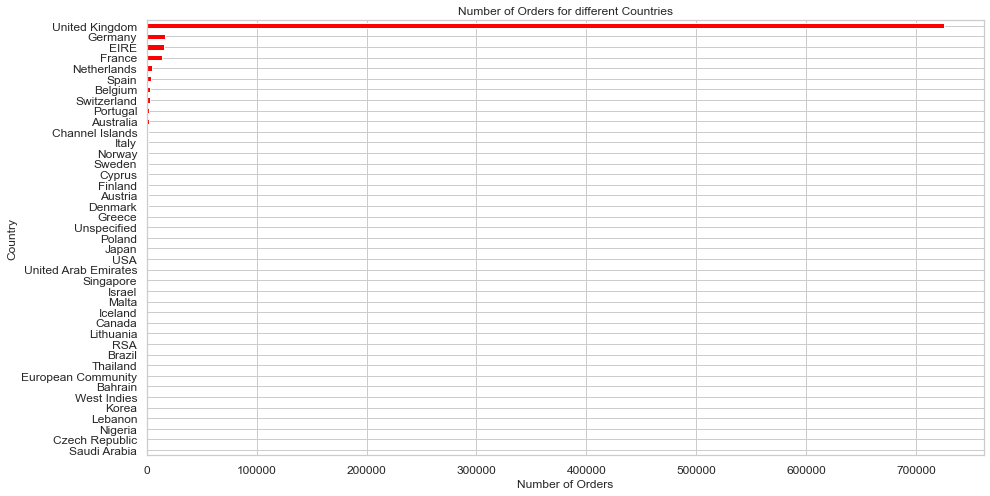

In [196]:
# Visualization_ The number of unique customers in each country (with UK)

plt.subplots(figsize=(15,8))
NumberofOrdersPerCountry.plot(kind='barh',color="red", fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [197]:
# How would be the distribution of unique customers over different countries if we exclude the UK???

NumberofOrdersPerCountry = df2.groupby('Country')['InvoiceDate'].count().sort_values()
NumberofOrdersPerCountry_Except_UK = NumberofOrdersPerCountry.copy()
NumberofOrdersPerCountry_Except_UK=NumberofOrdersPerCountry_Except_UK.drop('United Kingdom')


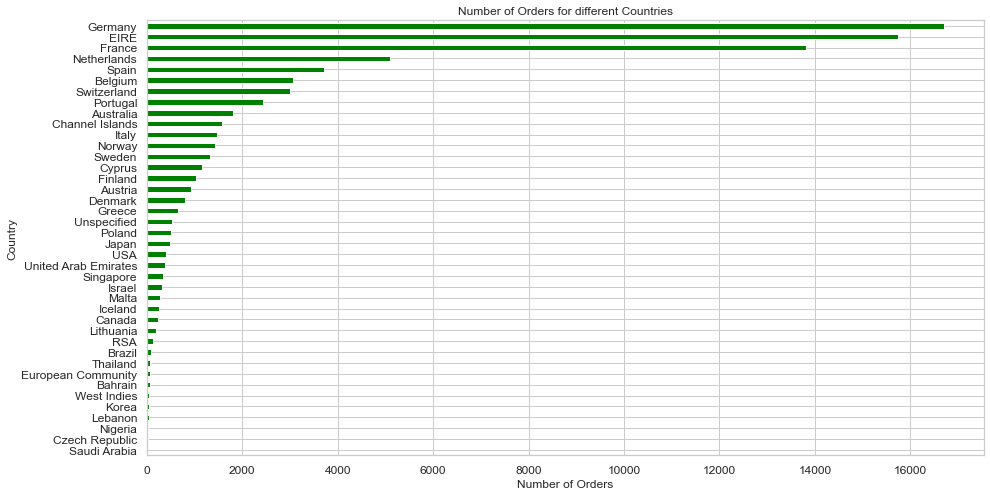

In [198]:
# Visualization_ The Number of unique customers in each country excluding UK

plt.subplots(figsize=(15,8))
NumberofOrdersPerCountry_Except_UK.plot(kind='barh', color="green",fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

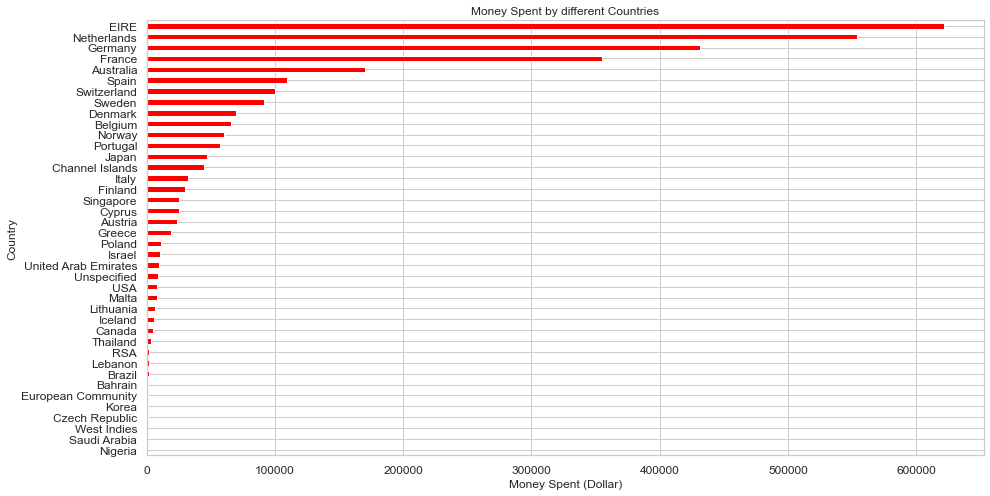

In [199]:
# Calculation and Visualization of Amount spent by each country excluding UK


AmountSpentPerCountry= df2.groupby('Country')['AmountSpent'].sum().sort_values()
AmountSpentPerCountry_Except_UK = AmountSpentPerCountry.copy()
AmountSpentPerCountry_Except_UK=AmountSpentPerCountry_Except_UK.drop('United Kingdom')

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
AmountSpentPerCountry_Except_UK.plot(kind='barh', color="red", fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

# Returning customers

In [200]:
# What is the date range for our data

print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

Date Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00


In [ ]:
# In fact now we know that df2 = df2.loc[df2['InvoiceDate'] < '2011-12-10'] or we may prefer just to use transactions befor Dec1

In [201]:
# Calculate the total amount spent per invoice and report with respective CustomerID and Country

CustomerSpendingPerInvoice_df= df2.groupby(by=['Invoice', 'InvoiceDate']).agg({'AmountSpent': sum, 'Customer ID': max,'Country': max,}).reset_index()
CustomerSpendingPerInvoice_df.head()

,Invoice,InvoiceDate,AmountSpent,Customer ID,Country
0,489434,2009-12-01 07:45:00,505.30,13085,United Kingdom
1,489435,2009-12-01 07:46:00,145.80,13085,United Kingdom
2,489436,2009-12-01 09:06:00,630.33,13078,United Kingdom
3,489437,2009-12-01 09:08:00,310.75,15362,United Kingdom
4,489438,2009-12-01 09:24:00,2286.24,18102,United Kingdom


In [202]:
# To find the largest invoices I sort on amount spent

CustomerSpendingPerInvoice_df.sort_values(by='AmountSpent', ascending=False).head(10)

,Invoice,InvoiceDate,AmountSpent,Customer ID,Country
37006,581483,2011-12-09 09:15:00,168469.60,16446,United Kingdom
20384,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
1605,493819,2010-01-07 12:34:00,44051.60,14156,EIRE
26422,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
13457,524181,2010-09-27 16:59:00,33167.80,17450,United Kingdom
19038,537659,2010-12-07 16:43:00,31770.98,18102,United Kingdom
30919,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
14654,526934,2010-10-14 09:46:00,26007.08,18102,United Kingdom
10036,515944,2010-07-15 15:29:00,22863.36,18102,United Kingdom
26608,556917,2011-06-15 13:37:00,22775.93,12415,Australia


In [203]:
# The count of unique returning customers for each month

# First I need to group data by Month and Customer ID.
# For that, I set the index to the invoice date and use Grouper(freq='M') which groups data by the index 'InvoiceDate' by Month
# and then I group this data by CustomerID
# Now I can count the number of unique returning customers for that month (data is the month end date)
# For this, I use a filter function to subselect data by the rule in its lambda function i.e. those greater than 1 


MonthlyReturningCustomers_df = CustomerSpendingPerInvoice_df.set_index('InvoiceDate').groupby([ pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

MonthlyReturningCustomers_df


# Note: in Calculation of frequency in RFM method of customer life time value I will calculate the customer returns by
# by calculation of Duration>0 instead of Count>1. I will use it later in the relevant part.

InvoiceDate
2009-12-31    286
2010-01-31    148
2010-02-28    175
2010-03-31    238
2010-04-30    203
2010-05-31    228
2010-06-30    258
2010-07-31    256
2010-08-31    223
2010-09-30    278
2010-10-31    357
2010-11-30    529
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: M, Name: Customer ID, dtype: int64

In [204]:
# Number of Unique customers per month


MonthlyUniqueCustomers_df = df2.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()
MonthlyUniqueCustomers_df

InvoiceDate
2009-12-31     955
2010-01-31     720
2010-02-28     774
2010-03-31    1057
2010-04-30     942
2010-05-31     966
2010-06-30    1041
2010-07-31     928
2010-08-31     911
2010-09-30    1145
2010-10-31    1497
2010-11-30    1607
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
2011-12-31     615
Freq: M, Name: Customer ID, dtype: int64

In [205]:
MonthlyPercentageOfReturningCustomer= 100 * MonthlyReturningCustomers_df/MonthlyUniqueCustomers_df
MonthlyPercentageOfReturningCustomer

InvoiceDate
2009-12-31    29.947644
2010-01-31    20.555556
2010-02-28    22.609819
2010-03-31    22.516556
2010-04-30    21.549894
2010-05-31    23.602484
2010-06-30    24.783862
2010-07-31    27.586207
2010-08-31    24.478595
2010-09-30    24.279476
2010-10-31    23.847695
2010-11-30    32.918482
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
2011-12-31    17.235772
Freq: M, Name: Customer ID, dtype: float64

In [1]:
# Visualization of Customer study


ax = pd.DataFrame(MonthlyReturningCustomers_df.values).plot(figsize=(12,8))

pd.DataFrame(MonthlyUniqueCustomers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(MonthlyPercentageOfReturningCustomer.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, MonthlyUniqueCustomers_df.values.max()+100])
ax2.set_ylim([0, 100])

#plt.xticks(range(len(MonthlyReturningCustomers_df.index)), [x.strftime('%m.%Y') for x in MonthlyReturningCustomers_df.index], rotation=45)

#plt.show()

NameError: name 'pd' is not defined

In [207]:
# Investigate of the relationship between revenue and repeat customers
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = CustomerSpendingPerInvoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2009-12-31    63.162306
2010-01-31    57.299033
2010-02-28    52.988188
2010-03-31    52.587157
2010-04-30    46.468042
2010-05-31    49.013269
2010-06-30    53.461142
2010-07-31    56.455875
2010-08-31    52.921666
2010-09-30    53.480315
2010-10-31    52.119059
2010-11-30    62.620735
2010-12-31    63.199865
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
2011-12-31    28.334796
Freq: M, Name: AmountSpent, dtype: float64

In [2]:
# Visualization of above info


ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

#plt.show()

NameError: name 'pd' is not defined

# Item's sale Trends: count of items sold for each product for each period

In [208]:
# Quantity of each item sold per month

date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(10)

InvoiceDate  StockCode
2009-12-31   10002        213
             10080          4
             10109          4
             10120        106
             10123C       138
             10125        124
             10133        153
             10134         42
             10135        107
             10138        167
Name: Quantity, dtype: int64

In [209]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


In [210]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2009-12-31   22086        3362
             22197        1928
             84826         124
             85099B       3770
2010-01-31   22086          23
                          ... 
2011-12-31   22086        2089
             22197        6198
             23084        4298
             84826          92
             85099B       1090
Name: Quantity, Length: 104, dtype: int64

In [368]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2009-12-31,3362.0,1928.0,0.0,124.0,3770.0
2010-01-31,23.0,733.0,0.0,2.0,3572.0
2010-02-28,-2.0,1571.0,0.0,7.0,2661.0
2010-03-31,17.0,1490.0,0.0,60.0,3256.0
2010-04-30,19.0,-8584.0,0.0,1.0,3942.0
2010-05-31,58.0,804.0,0.0,0.0,3596.0
2010-06-30,378.0,1776.0,0.0,60.0,4321.0
2010-07-31,107.0,2144.0,0.0,73.0,3582.0
2010-08-31,299.0,2574.0,0.0,0.0,457.0


In [3]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

#plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

#plt.show()

NameError: name 'pd' is not defined

In [ ]:
# Ranking Tier Categories
# To organize our tier data as categorical data


#tiers = pd.Categorical(df['customer_tier'],
#                           categories=['Gold', 'Silver', 'Bronze', 'Free-Trial'], ordered=True)
#df['customer_tier'] = tiers

#df.sample(10).sort_values('customer_tier')


In [ ]:
#df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx")

#pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', sep="\t", names = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction/side','Scaled/sound']) 
